# Explorations with heterogenous observability actor-critic agents with multiple histories

In [2]:
from pyCRLD.Environments.Base import ebase

from fastcore.utils import *
from fastcore.test import *

from pyCRLD.Environments.HeterogeneousObservationsEnv import HeterogeneousObservationsEnv
from pyCRLD.Environments.MultipleObsSocialDilemma import MultipleObsSocialDilemma

from pyCRLD.Agents.POStrategyActorCritic import POstratAC
from pyCRLD.Utils import FlowPlot as fp

from pyCRLD.Environments.HistoryEmbedding import HistoryEmbedded, ObsActHistsIx, hOset

import numpy as np
import matplotlib.pyplot as plt

### Several experiments using 1 history with partial heterogeneuos observability with focus on diagonal matrixes: 

In [3]:
env_full_obs_homo = MultipleObsSocialDilemma(rewards=1, temptations=1.2, suckers_payoffs=-0.5, punishments=0, observation_value=[1, 0.1])

self.q 1


In [4]:
env_full_obs_homo.Sset

['.']

In [5]:
env_full_obs_homo.Oset

[['.'], ['.']]

In [35]:
env_full_obs_homo.O

array([[[1. ]],

       [[0.1]]])

In [36]:
memo1pd = HistoryEmbedded(env_full_obs_homo, h=(1,1,1), observation_type='diagonal_confidence', observation_value=[1, 0.1])

In [37]:
memo1pd.Oset

[['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|'],
 ['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|']]

In [45]:
memo1pd.O

array([[[1.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 0.  , 1.  ]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.  , 0.25, 0.25, 0.25],
        [0.  , 0.  , 0.25, 0.25],
        [0.  , 0.  , 0.  , 0.25]]])

In [46]:
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3], [0])
y = ([1], [0,1,2,3], [0])

In [47]:
mae1.env.Sset

['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|']

In [48]:
# TODO: I don't really understand why the set of a history looks like this?
mae1.env.Oset

[['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|'],
 ['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|']]

In [62]:
# UPPER DIAGONAL
memo1pd.O[1]=np.array([[0.25, 0.25, 0.25, 0.25  ],
                       [0.  , 0.25, 0.25, 0.25  ],
                       [0.  , 0.  , 0.25, 0.25  ],
                       [0.  , 0.  , 0.  , 0.25]])
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3], [0])
y = ([1], [0,1,2,3], [0])

 [plot] generating data 99 %   

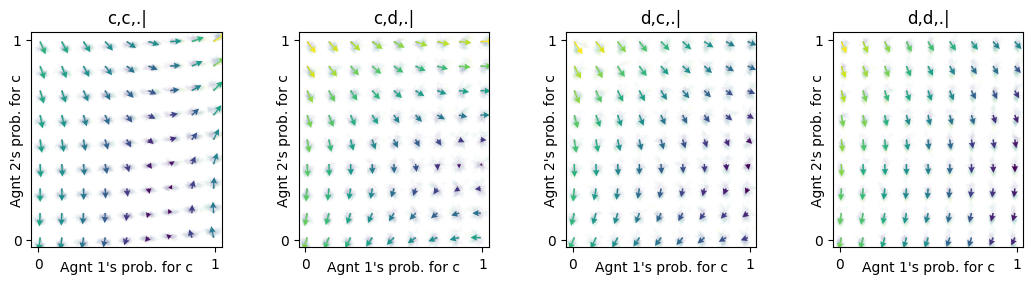

In [63]:
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=mae1.env.Sset, verbose=True)

We observe much better cooperation outcomes... But I guess, that comes from the fact that it's easy for agents to see cooperation and hard to see defection.
For example if we increase the D,D probability:

In [64]:
# UPPER DIAGONAL with high probability to observe defection
memo1pd.O[1]=np.array([[0.25, 0.25, 0.25, 0.25  ],
                       [0.  , 0.25, 0.25, 0.5  ],
                       [0.  , 0.  , 0.25, 0.75  ],
                       [0.  , 0.  , 0.  , 1]])
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3], [0])
y = ([1], [0,1,2,3], [0])

 [plot] generating data 99 %   

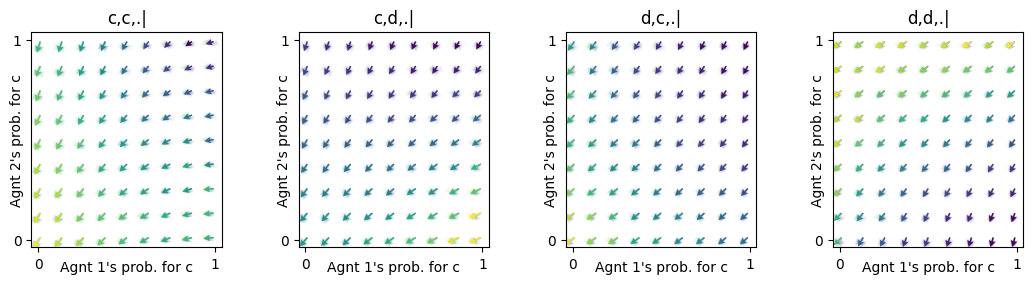

In [65]:
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=mae1.env.Sset, verbose=True)

Yep. If you increase the probability of observing D,D it greatly decreases capacity for cooperation.

In [72]:
# Partial observability everywhere but in the C,C array
memo1pd.O[1]=np.array([[1, 0., 0., 0.  ],
                       [0.25  , 0.25, 0.25, 0.25  ],
                       [0.25  , 0.25  , 0.25, 0.25  ],
                       [0.25  , 0.25  , 0.25, 0.25  ]])
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3], [0])
y = ([1], [0,1,2,3], [0])

 [plot] generating data 99 %   

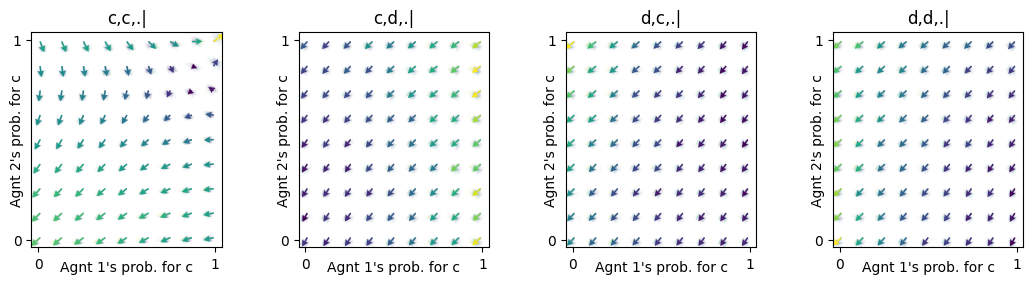

In [73]:
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=mae1.env.Sset, verbose=True)

It's a mix. But it decreases cooperative outcomes, as expected because their memory is just shorter so iterated results of cooperation boosts don't work here. This makes sense for 1 iteration, I'm curious about how this would change in a larger memory space. E.g how much having remembered one cooperation will be benefitial to the rest of the outcomes?

In [74]:
# Partial observability everywhere
memo1pd.O[1]=np.array([[0.25  , 0.25, 0.25, 0.25  ],
                       [0.25  , 0.25, 0.25, 0.25  ],
                       [0.25  , 0.25  , 0.25, 0.25  ],
                       [0.25  , 0.25  , 0.25, 0.25  ]])
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3], [0])
y = ([1], [0,1,2,3], [0])

 [plot] generating data 99 %   

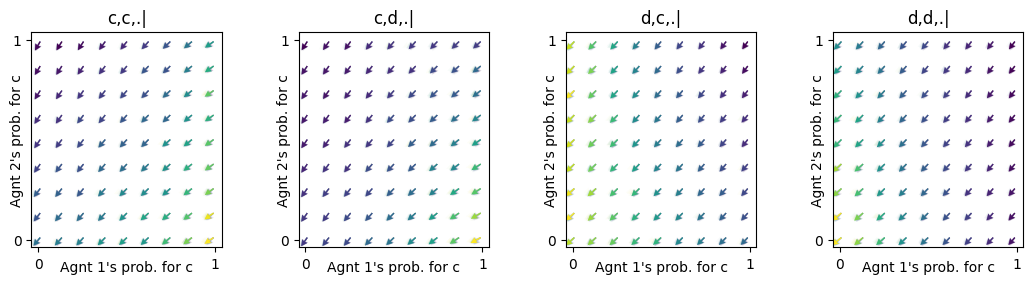

In [75]:
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=mae1.env.Sset, verbose=True)

In [79]:
# LOWER DIAGONAL
memo1pd.O[1]=np.array([[0.25, 0, 0, 0  ],
                       [0.25  , 0.25, 0, 0  ],
                       [0.25  , 0.25  , 0.25, 0.  ],
                       [0.25  , 0.25  , 0.25  , 0.25]])
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3], [0])
y = ([1], [0,1,2,3], [0])

 [plot] generating data 99 %   

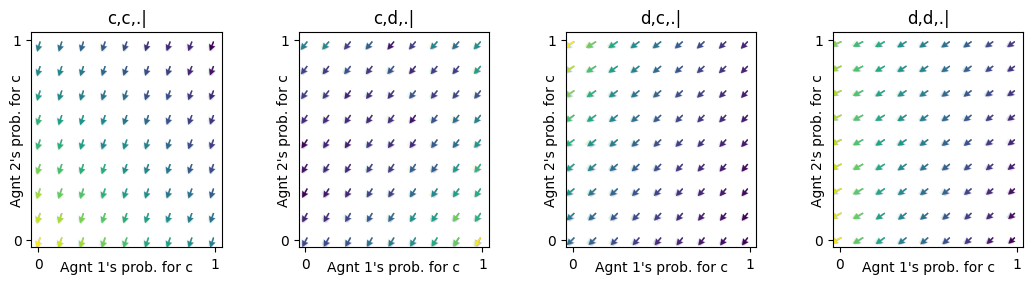

In [80]:
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=mae1.env.Sset, verbose=True)

I think the result above (very high tendency to defect) is just because I have very low probability to see C,C outcomes which seems to be very important.

In [81]:
# LOWER DIAGONAL with high probability to observe cooperation
memo1pd.O[1]=np.array([[1, 0, 0, 0  ],
                       [0.75  , 0.25, 0, 0  ],
                       [0.5  , 0.25  , 0.25, 0.  ],
                       [0.25  , 0.25  , 0.25  , 0.25]])
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3], [0])
y = ([1], [0,1,2,3], [0])

 [plot] generating data 99 %   

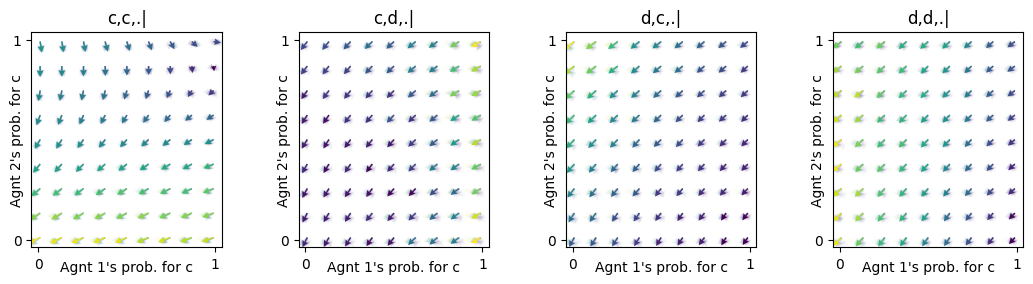

In [78]:
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=mae1.env.Sset, verbose=True)

Though the graphs above have higher C,C probabilities and still look really bad for cooperation once you compare it with:

```python
# UPPER DIAGONAL
memo1pd.O[1]=np.array([[0.25, 0.25, 0.25, 0.25  ],
                       [0.  , 0.25, 0.25, 0.25  ],
                       [0.  , 0.  , 0.25, 0.25  ],
                       [0.  , 0.  , 0.  , 0.25]])
```

Though it clearly performs better when compared with:

```python
# UPPER DIAGONAL with high probability to observe defection
memo1pd.O[1]=np.array([[0.25, 0.25, 0.25, 0.25  ],
                       [0.  , 0.25, 0.25, 0.5  ],
                       [0.  , 0.  , 0.25, 0.75  ],
                       [0.  , 0.  , 0.  , 1]])
```

### Experiment with 2 history and extreme heterogenous agents (fully blind and fully knowlegeable):

In [214]:
env_hetero_extreme = MultipleObsSocialDilemma(rewards=1, temptations=1.2, suckers_payoffs=-0.5, punishments=0, observation_value=[1, 0])

size of attr list 1
size of attr list 1.2
size of attr list -0.5
size of attr list 0
self.q 1


In [215]:
env_hetero_extreme.O

array([[[1.]],

       [[0.]]])

In [216]:
memo1pd = HistoryEmbedded(env_hetero_extreme, h=(2,2,2), observation_type=['default', 'fill'])

In [217]:
memo1pd.O

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [159]:
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], [0])
y = ([1], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], [0])

 [plot] generating data 99 %   

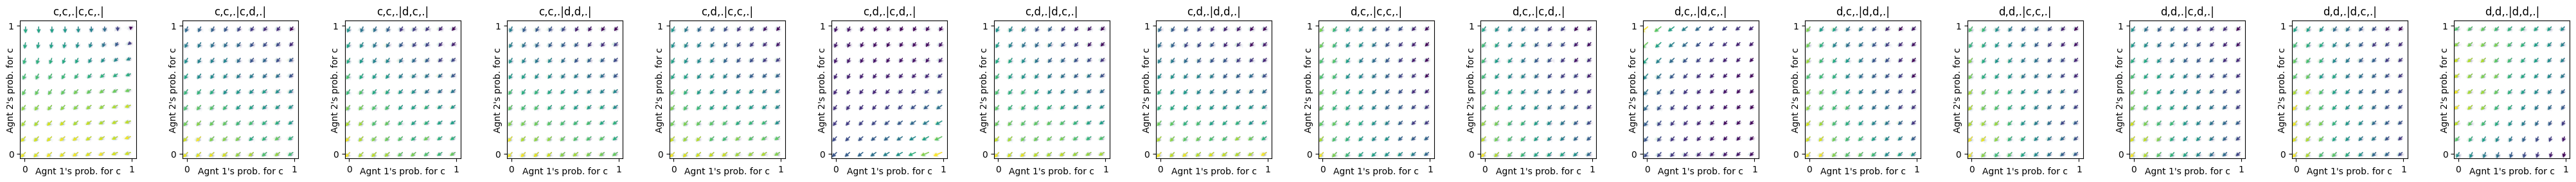

In [218]:
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=mae1.env.Sset, verbose=True)
fig = plt.gcf()  # Get current figure
fig.savefig('h222_a0_1_full_obs_default_a1_0_full_blind_fill.png')

### Experiments with 2 history and default heterogenous agents:

In [201]:
env_hetero_default = MultipleObsSocialDilemma(rewards=1, temptations=1.2, suckers_payoffs=-0.5, punishments=0, observation_value=[1, 0.5])

size of attr list 1
size of attr list 1.2
size of attr list -0.5
size of attr list 0
self.q 1


In [202]:
memo1pd = HistoryEmbedded(env_hetero_default, h=(2,2,2), observation_type=['default', 'default'])

In [203]:
memo1pd.O

array([[[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ,
         0.    

In [205]:
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], [0])
y = ([1], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], [0])

 [plot] generating data 99 %   

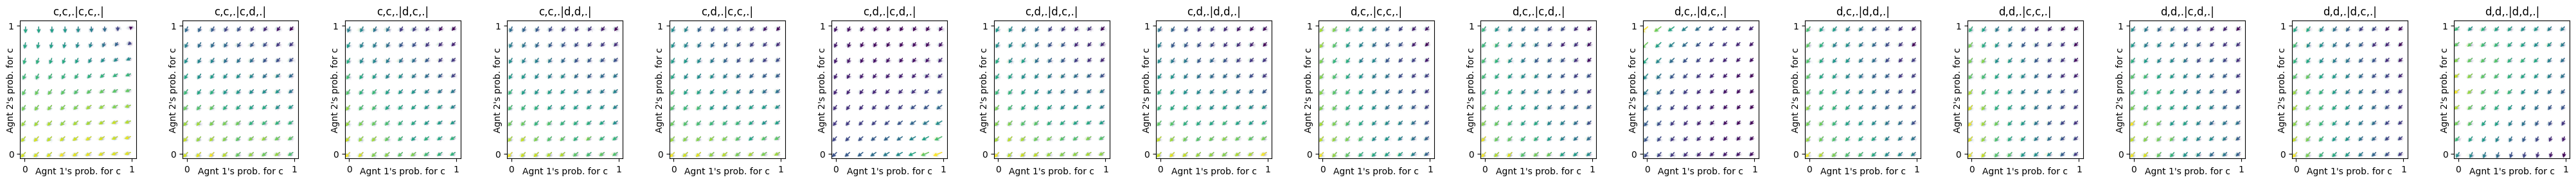

In [206]:
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=mae1.env.Sset, verbose=True)
fig = plt.gcf()  # Get current figure
fig.savefig('h222_a0_1_full_obs_default_a1_05_003_default.png')